# Excercises DET

## Task A

Find some data here [1] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

[1] https://drive.google.com/open?id=1E3bFrHnMGGmBgyAk9vAVnHGpQ8Z_asOP

## Solution A

In [1]:
import pandas as pd
import numpy as np
import math

'Transcoded' the GIF to CSV with ocr.space
https://moodle.oncampus.de/mod/forum/discuss.php?d=355794

In [2]:
url = "https://raw.githubusercontent.com/githtestaccount/DS2022-tm/main/data.csv"
df = pd.read_csv(url, sep=';')

In [3]:
df

,REC,Age,Income,Student,Credit_rating,Buys_computer
0,r1,<=30,High,No,Fair,No
1,r2,=30,High,No,Excellent,No
2,r3,31...40,High,No,Fair,Yes
3,r4,>40,Medium,No,Fair,Yes
4,r5,40,Low,Yes,Fair,Yes
5,r6,>40,Low,Yes,Excellent,No
6,r7,31...40,Low,Yes,Excellent,Yes
7,r8,<=30,Medium,No,Fair,No
8,r9,<30,Low,Yes,Fair,Yes
9,r10,40,Medium,Yes,Fair,Yes


In [4]:
def calc_entropy(data, target_column):
    
    value_counts = data[target_column].value_counts()
    probabilities = value_counts / len(data)
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob, 2) 
    return -entropy

In [5]:
ent_orig = calc_entropy(df, 'Buys_computer')
print("Original entropy: ", ent_orig)

Original entropy:  0.9709505944546686


In [12]:
def calc_igain(split, target):
    
    #create helper table TODO: make both functions generic for column/series inputs
    df2 = df.loc[:,[split, target]]
    values = df2[split].unique()
    
    # iterate all possible binary splits
    for i in range(len(values)):
        rest = values
        one = rest[i]
        rest = np.delete(rest, i)
        split_one = df2[df2[split]==one][target]
        split_rest = df2[df2[split].isin(rest)][target]
        
        # calculate information gain per possible split
        ent_one = calc_entropy(pd.DataFrame(split_one), target)
        occ_one = len(split_one)/len(df2)
        ent_rest = calc_entropy(pd.DataFrame(split_rest), target)
        occ_rest = len(split_rest)/len(df2)
        information_gain = ent_orig - (ent_one * occ_one + ent_rest * occ_rest)
        
        print("In column: ", split, " information_gain is: ", information_gain, "for split on value: ", one)

In [7]:
for column in ['Age', 'Income', 'Student', 'Credit_rating']:
    calc_igain(column, 'Buys_computer')

In column:  Age  information_gain is:  0.16298801427695242 for split on value:  <=30
In column:  Age  information_gain is:  0.06897117983611756 for split on value:  =30
In column:  Age  information_gain is:  0.2812908992306925 for split on value:  31...40
In column:  Age  information_gain is:  0.002401074447549334 for split on value:  >40
In column:  Age  information_gain is:  0.002401074447549334 for split on value:  40
In column:  Age  information_gain is:  0.03810684693377586 for split on value:  <30
In column:  Age  information_gain is:  0.06897117983611756 for split on value:  30
In column:  Income  information_gain is:  0.0 for split on value:  High
In column:  Income  information_gain is:  0.0012557392939909207 for split on value:  Medium
In column:  Income  information_gain is:  0.001316953772811047 for split on value:  Low
In column:  Student  information_gain is:  0.2243711762752758 for split on value:  No
In column:  Student  information_gain is:  0.2243711762752758 for spli

First split would be on value "31...40" in conlumn "Age".

## Task B

Compare your tree against the tree derived from SciKit Learn as given in the Python example before! Why are they different? Print the tree with Graphviz (can be easily done with WebGraphViz [2])

[2] http://www.webgraphviz.com/


## Solution for B

Recreate example tree from DET lesson (sklearn DecisionTreeClassifier default split criterion)

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [9]:
export_graphviz(
    tree_clf,
    # out_file="/home/user1/Dropbox/SoSe2022/Data Science (SoSe22)/Aufgaben/10/iris_tree_default.dot",
    out_file="iris_tree_default.dot",
         feature_names=iris.feature_names[2:],
         class_names=iris.target_names,
         rounded=True,
         filled=True
)

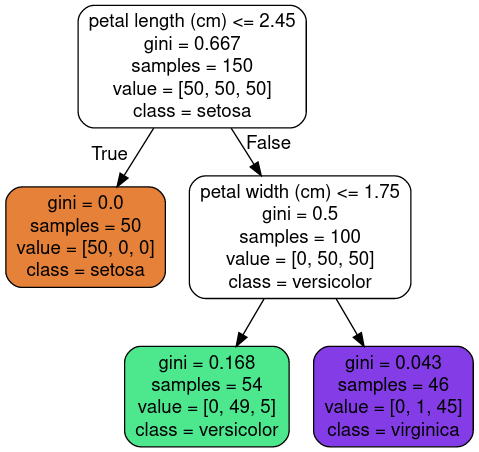

Refit classifier with information gain parameter and compare trees

In [10]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [11]:
export_graphviz(
    tree_clf,
    # out_file="/home/user1/Dropbox/SoSe2022/Data Science (SoSe22)/Aufgaben/10/iris_tree_default.dot",
    out_file="iris_tree_entropy.dot",
         feature_names=iris.feature_names[2:],
         class_names=iris.target_names,
         rounded=True,
         filled=True
)

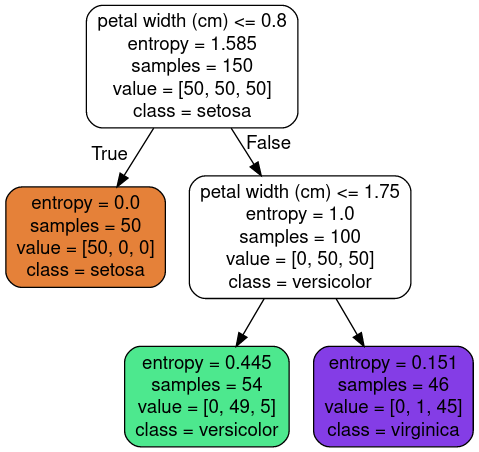

**Explanation:** With default parameters the scikit DecisionTreeClassifier uses Gini impurity to measure the quality of a split. Compared to the shannon entropy splitting (https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation) in the second tree both criterion seem to split the setosa class perfectly and have identical cardinalities for the second split (versicolor). Individuals and probabilities could be different however.